#  Basit Doğrusal Regresyon


In [4]:
import pandas as pd
df = pd.read_csv("Advertising.csv")
df = df.iloc[:, 1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


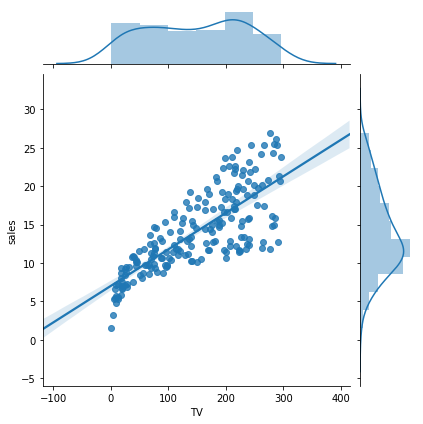

In [9]:
import seaborn as sns
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg");

In [10]:
from sklearn.linear_model import LinearRegression

In [17]:
X = df[["TV"]]
y = df[["sales"]]

In [18]:
reg = LinearRegression()

In [19]:
model = reg.fit(X, y)

In [26]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [24]:
# b0
model.intercept_

array([7.03259355])

In [25]:
# b1
model.coef_

array([[0.04753664]])

In [28]:
# R square
model.score(X, y)

0.611875050850071

In [30]:
import matplotlib.pyplot as plt

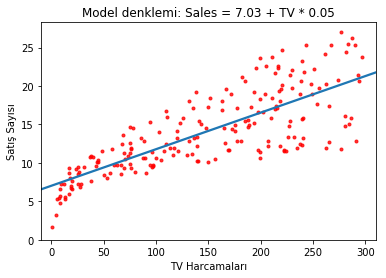

In [37]:
g = sns.regplot(df["TV"], df["sales"], ci = None, scatter_kws = {'color':'r', 's':9})
g.set_title("Model denklemi: Sales = 7.03 + TV * 0.05")
g.set_ylabel("Satış Sayısı") 
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0);

In [38]:
# TV = 165
model.predict([[165]])

array([[14.87613922]])

In [39]:
new_data = [[5], [15], [30]]
model.predict(new_data)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

In [44]:
actual_y = y[0:10]
prediction_y =pd.DataFrame(model.predict(X)[0:10])

In [51]:
inaccuracy = pd.concat([actual_y, prediction_y], axis= 1)
inaccuracy.columns = ["actual", "prediction"]
inaccuracy

,actual,prediction
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [52]:
inaccuracy["inaccuracy"] = inaccuracy["actual"] - inaccuracy["prediction"]
inaccuracy

,actual,prediction,inaccuracy
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [53]:
inaccuracy["inaccuracy_square"] = inaccuracy["inaccuracy"] ** 2
inaccuracy

,actual,prediction,inaccuracy,inaccuracy_square
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [58]:
import numpy as np
np.mean(inaccuracy["inaccuracy_square"])

9.290350329638105